<hr>

# Exploratory Data Analysis

Kolton Hauck
<hr>

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

%load_ext rpy2.ipython
%matplotlib inline

C:\Users\Hauck\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%R
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.1     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.1     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load Data

In [3]:
df =  pd.read_csv('cleaned_data_20230401.csv', index_col=0)
df.head()

,Isolate_Id,Isolate_Name,Lineage,Species,Type,Continent,Country,Region,Collection_Year,Collection_Month,pdm09,Victoria,Yamagata,seasonal
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,pdm09,A,H1N1,Europe,Russian Federation,Republic of Karelia,2022.0,1.0,True,False,False,False
1,EPI_ISL_16647787,A/South Africa/R06539/2022,Victoria,B,NaN,Africa,South Africa,Mpumalanga,2022.0,5.0,False,True,False,False
2,EPI_ISL_16647783,A/South Africa/R05932/2022,pdm09,A,H1N1,Africa,South Africa,Province of the Western Cape,2022.0,5.0,True,False,False,False
3,EPI_ISL_16647781,A/South Africa/R05856/2022,pdm09,A,H1N1,Africa,South Africa,Gauteng,2022.0,5.0,True,False,False,False
4,EPI_ISL_16647739,A/South Africa/R07669/2022,pdm09,A,H1N1,Africa,South Africa,Gauteng,2022.0,6.0,True,False,False,False


## Distributions -- Static

[Text(0.5, 1.0, 'Lineages across continents')]

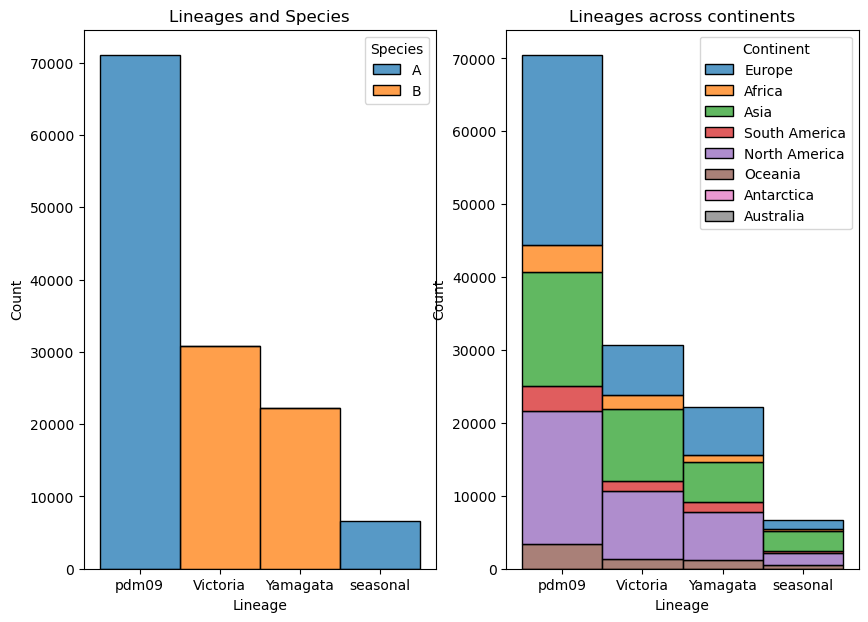

In [7]:
#colors
palette = dict(zip(df.Continent.drop_duplicates(), sns.color_palette(n_colors=len(df.Continent.drop_duplicates()))))

fig, axes = plt.subplots(1, 2, figsize=(10, 7), sharey=False)

sns.histplot(data=df[['Lineage', 'Species']].dropna(), x='Lineage', hue='Species', multiple='stack', ax=axes[0]).set(title='Lineages and Species')

sns.histplot(data=df[['Lineage', 'Continent']].dropna(), x='Lineage', hue='Continent', multiple='stack', ax=axes[1]).set(title='Lineages across continents')

### ViolinPlots

<AxesSubplot:xlabel='Collection_Month', ylabel='Continent'>

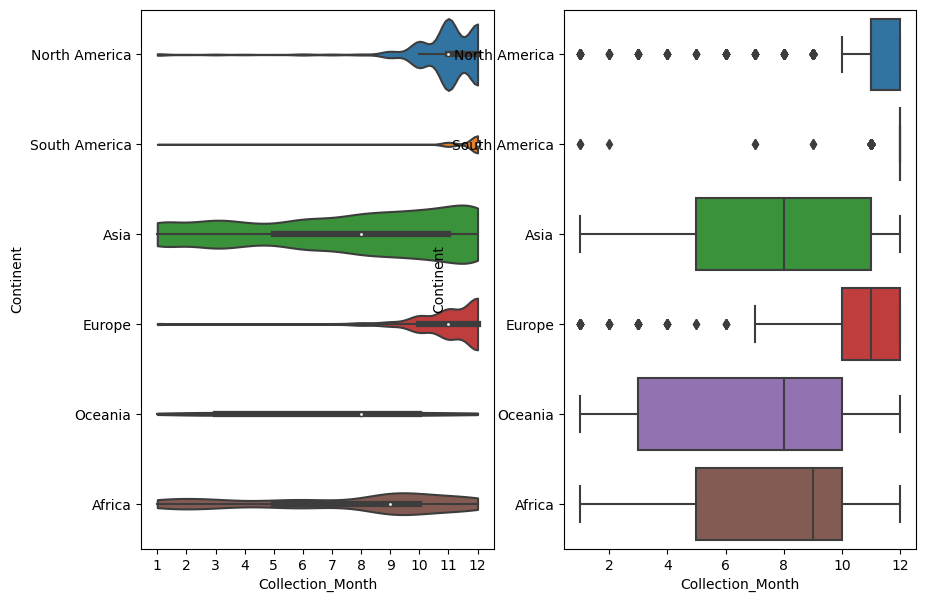

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7), sharey=False)

vp = sns.violinplot(data=df[df['Collection_Year'] == 2021.0], x='Collection_Month', y='Continent', scale='count', cut=0, ax=axes[0])
vp.set_xticks(range(1,13))
#vp.set_xlim(1, 12)

sns.boxplot(data=df[df['Collection_Year'] == 2021.0], x='Collection_Month', y='Continent', ax=axes[1])

## Distributions -- Dynamic

### violin - by continent

In [144]:
def update_plot(year):
    # clear the axis before the plot is redrawn
    #ax.clear()
    
    vp = sns.violinplot(data=df[df['Collection_Year'] == year],
                   x='Collection_Month',
                   y='Continent',
                   scale='count',
                   cut=0,
                   order=['North America', 'Asia', 'Africa', 'Europe', 'South America', 'Oceania']
                  )
    
    vp.set_xticks(range(1,13))
    #fig.canvas.draw_idle()

    
slider = widgets.IntSlider(min=2000, max=2023, description='Year')
ui = widgets.HBox([slider])

out = widgets.interactive_output(update_plot, {'year': slider})

display(ui, out)

Output()

### stacked hist - by continent

In [148]:
palette = dict(zip(df.Continent.drop_duplicates(), sns.color_palette(n_colors=len(df.Continent.drop_duplicates()))))

def update_plot(year):
    # clear the axis before the plot is redrawn
    #ax.clear()
    
    
    sns.histplot(data=df[df['Collection_Year'] == year][['Lineage', 'Continent']].dropna(),
                 x='Lineage',
                 hue='Continent',
                 multiple='stack',
                 #palette=palette,
                 cumulative=True,
                 hue_order=['North America', 'Asia', 'Africa', 'Europe', 'South America', 'Oceania']
                ).set(title=f'Lineages across continents, year: {year}')
    #fig.canvas.draw_idle()

    
slider = widgets.IntSlider(min=2000, max=2023, description='Year')
ui = widgets.HBox([slider])

out = widgets.interactive_output(update_plot, {'year': slider})

display(ui, out)

Output()

### stacked hist - by subtype

In [152]:
palette = dict(zip(df.Continent.drop_duplicates(), sns.color_palette(n_colors=len(df.Continent.drop_duplicates()))))

def update_plot(year):
    # clear the axis before the plot is redrawn
    #ax.clear()
    
    
    sns.histplot(data=df[df['Collection_Year'] == year][['Type', 'Continent']].dropna(),
                 x='Type',
                 hue='Continent',
                 multiple='stack',
                 #palette=palette,
                 cumulative=True,
                 hue_order=['North America', 'Asia', 'Africa', 'Europe', 'South America', 'Oceania']
                ).set(title=f'Types across continents, year: {year}')
    #fig.canvas.draw_idle()

    
slider = widgets.IntSlider(min=2000, max=2023, description='Year')
ui = widgets.HBox([slider])

out = widgets.interactive_output(update_plot, {'year': slider})

display(ui, out)

Output()

## Line Plots

### Static

C:\Users\Hauck\AppData\Local\Temp\ipykernel_60028\1676366680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_by_month['Date'] = pd.to_datetime({'year': df['Collection_Year'], 'month': df['Collection_Month'], 'day': 1})


<AxesSubplot:xlabel='Date', ylabel='size'>

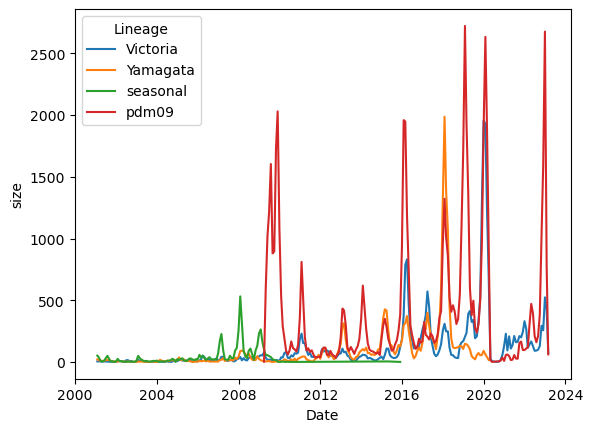

In [143]:
counts_by_month = df[df['Collection_Year'] > 2000]
counts_by_month['Date'] = pd.to_datetime({'year': df['Collection_Year'], 'month': df['Collection_Month'], 'day': 1})

sns.lineplot(data=counts_by_month.groupby([pd.Grouper(key='Date', freq='M'), 'Lineage'], as_index=False)[['Lineage', 'Date', 'Isolate_Id']].size(),
             x='Date',
             y='size',
             hue='Lineage')

C:\Users\Hauck\AppData\Local\Temp\ipykernel_60028\3629190834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_by_month_US['Date'] = pd.to_datetime({'year': df['Collection_Year'], 'month': df['Collection_Month'], 'day': 1})


<AxesSubplot:xlabel='Date', ylabel='size'>

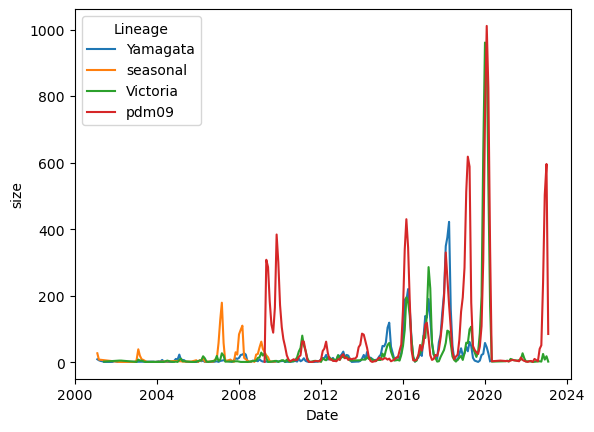

In [127]:
counts_by_month_US = df[(df['Collection_Year'] > 2000) & (df['Country'] == 'United States')]
counts_by_month_US['Date'] = pd.to_datetime({'year': df['Collection_Year'], 'month': df['Collection_Month'], 'day': 1})

sns.lineplot(data=counts_by_month_US.groupby([pd.Grouper(key='Date', freq='M'), 'Lineage'], as_index=False)[['Lineage', 'Date', 'Isolate_Id']].size(),
             x='Date',
             y='size',
             hue='Lineage')

### Dynamic

In [147]:
def update_plot(year):
    counts_by_month = df[df['Collection_Year'] == year]
    counts_by_month['Date'] = pd.to_datetime({'year': df['Collection_Year'], 'month': df['Collection_Month'], 'day': 1})

    sns.lineplot(data=counts_by_month.groupby([pd.Grouper(key='Date', freq='M'), 'Lineage'], as_index=False)[['Lineage', 'Date', 'Isolate_Id']].size(),
                 x='Date',
                 y='size',
                 hue='Lineage',
                 hue_order=['Victoria', 'Yamagata', 'pdm09', 'seasonal'])

    
slider = widgets.IntSlider(min=2000, max=2023, description='Year')
ui = widgets.HBox([slider])

out = widgets.interactive_output(update_plot, {'year': slider})

display(ui, out)

Output()

## Subplots - dynamic

In [4]:
year = 2020
df['Date'] = pd.to_datetime({'year': df['Collection_Year'], 'month': df['Collection_Month'], 'day': 1})


def update_plot(year):
    curr_df = df[df['Collection_Year'] == year]
    fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=False)

    #subplot 1
    sns.lineplot(data=curr_df.groupby([pd.Grouper(key='Date', freq='M'), 'Lineage'], as_index=False)[['Lineage', 'Date', 'Isolate_Id']].size(),
                 x='Date',
                 y='size',
                 hue='Lineage',
                 hue_order=['Victoria', 'Yamagata', 'pdm09', 'seasonal'],
                ax=axes[0][0])

    #subplot 2    
    vp = sns.violinplot(data=curr_df,
                   x='Collection_Month',
                   y='Continent',
                   scale='count',
                   cut=0,
                   order=['North America', 'Asia', 'Africa', 'Europe', 'South America', 'Oceania'],
                    ax=axes[0][1]
                  )

    vp.set_xticks(range(1,13))

    #subplot 3
    sns.histplot(data=curr_df[['Type', 'Continent']].dropna(),
                 x='Type',
                 hue='Continent',
                 multiple='stack',
                 #palette=palette,
                 cumulative=True,
                 hue_order=['North America', 'Asia', 'Africa', 'Europe', 'South America', 'Oceania'],
                 ax=axes[1][0]
                )#.set(title=f'Types across continents, year: {year}')

    #subplot 4
    sns.histplot(data=curr_df[['Lineage', 'Continent']].dropna(),
                 x='Lineage',
                 hue='Continent',
                 multiple='stack',
                 #palette=palette,
                 cumulative=True,
                 hue_order=['North America', 'Asia', 'Africa', 'Europe', 'South America', 'Oceania'],
                 ax=axes[1][1],
                 legend=False
                )#.set(title=f'Lineages across continents, year: {year}')
    
slider = widgets.IntSlider(min=2000, max=2023, description='Year')
ui = widgets.HBox([slider])

out = widgets.interactive_output(update_plot, {'year': slider})

display(ui, out)

Output()